# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 4</span>

### Exercise 04.1

The Molecular Dynamics (MD) code starts the simulation run from a provided spatial configuration of the $N$ particles (file: <font face="Courier">config.0</font>) and, once the simulation is finished, it writes out the final configuration (file: <font face="Courier">config.final</font>). 
1. <span style="color:red">Improve the MD code by enabling (you should insert this option via a boolean-like variable in the input file) the **possibility** to **(re)start** reading not only a **actual** spatial configuration [$\vec{r}(t)$] file but also an **old** spatial configuration [$\vec{r}(t-dt)$] file</span> (files: <font face="Courier">old.0</font> and <font face="Courier">old.final</font>).
2. Moreover, <span style="color:red">add the possibility to rescale the velocities [i.e. to correct $\vec{r}(t-dt)$] in order to match a desired temperature</span>.
3. In your report, put some pictures which show that you have been able to equilibrate the thermodynamic phases at the beginning of your simulations.

The typical required operations when the re-start option will be enabled are:
1. read $\vec{r}(t)$ and $\vec{r}(t-dt)$ from the corresponding input files
2. compute $\vec{r}(t+dt)$ with one step of the Verlet algorithm; with $\vec{r}(t+dt)$ and $\vec{r}(t)$ compute $\vec{v}(t+dt/2)$; finally obtain the actual temperature $T(t+dt/2)$
3. by comparing $T(t+dt/2)$ with the desired/target temperature  $T^\star$ extract a scaling factor for the velocities and rescale them: $\vec{v}(t) \to \vec{v}_s(t)$
4. use $\vec{v}_s(t)$ to estimate a novel **old** spatial configuration: $\vec{r}_{new}(t) = \vec{r}(t+dt) - dt \vec{v}_s$
5. use $\vec{r}_{new}(t)$ and $\vec{r}(t+dt)$ to start the simulation
6. Do not forget to use **periodic boundary contitions** every time it is appropriate!

This will help you, especially in the equilibration phases of your simulations.

In [190]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

state = ["solid","liquid","gas"]
title = ["ekin", "epot", "etot", "temp"]
S = ["Kinetic Energy", "Potential Energy", "Total Energy", "Temperature"]
Y  = ["$K/N$","$U/N$", "$E_{tot}/N$", "$T$"]

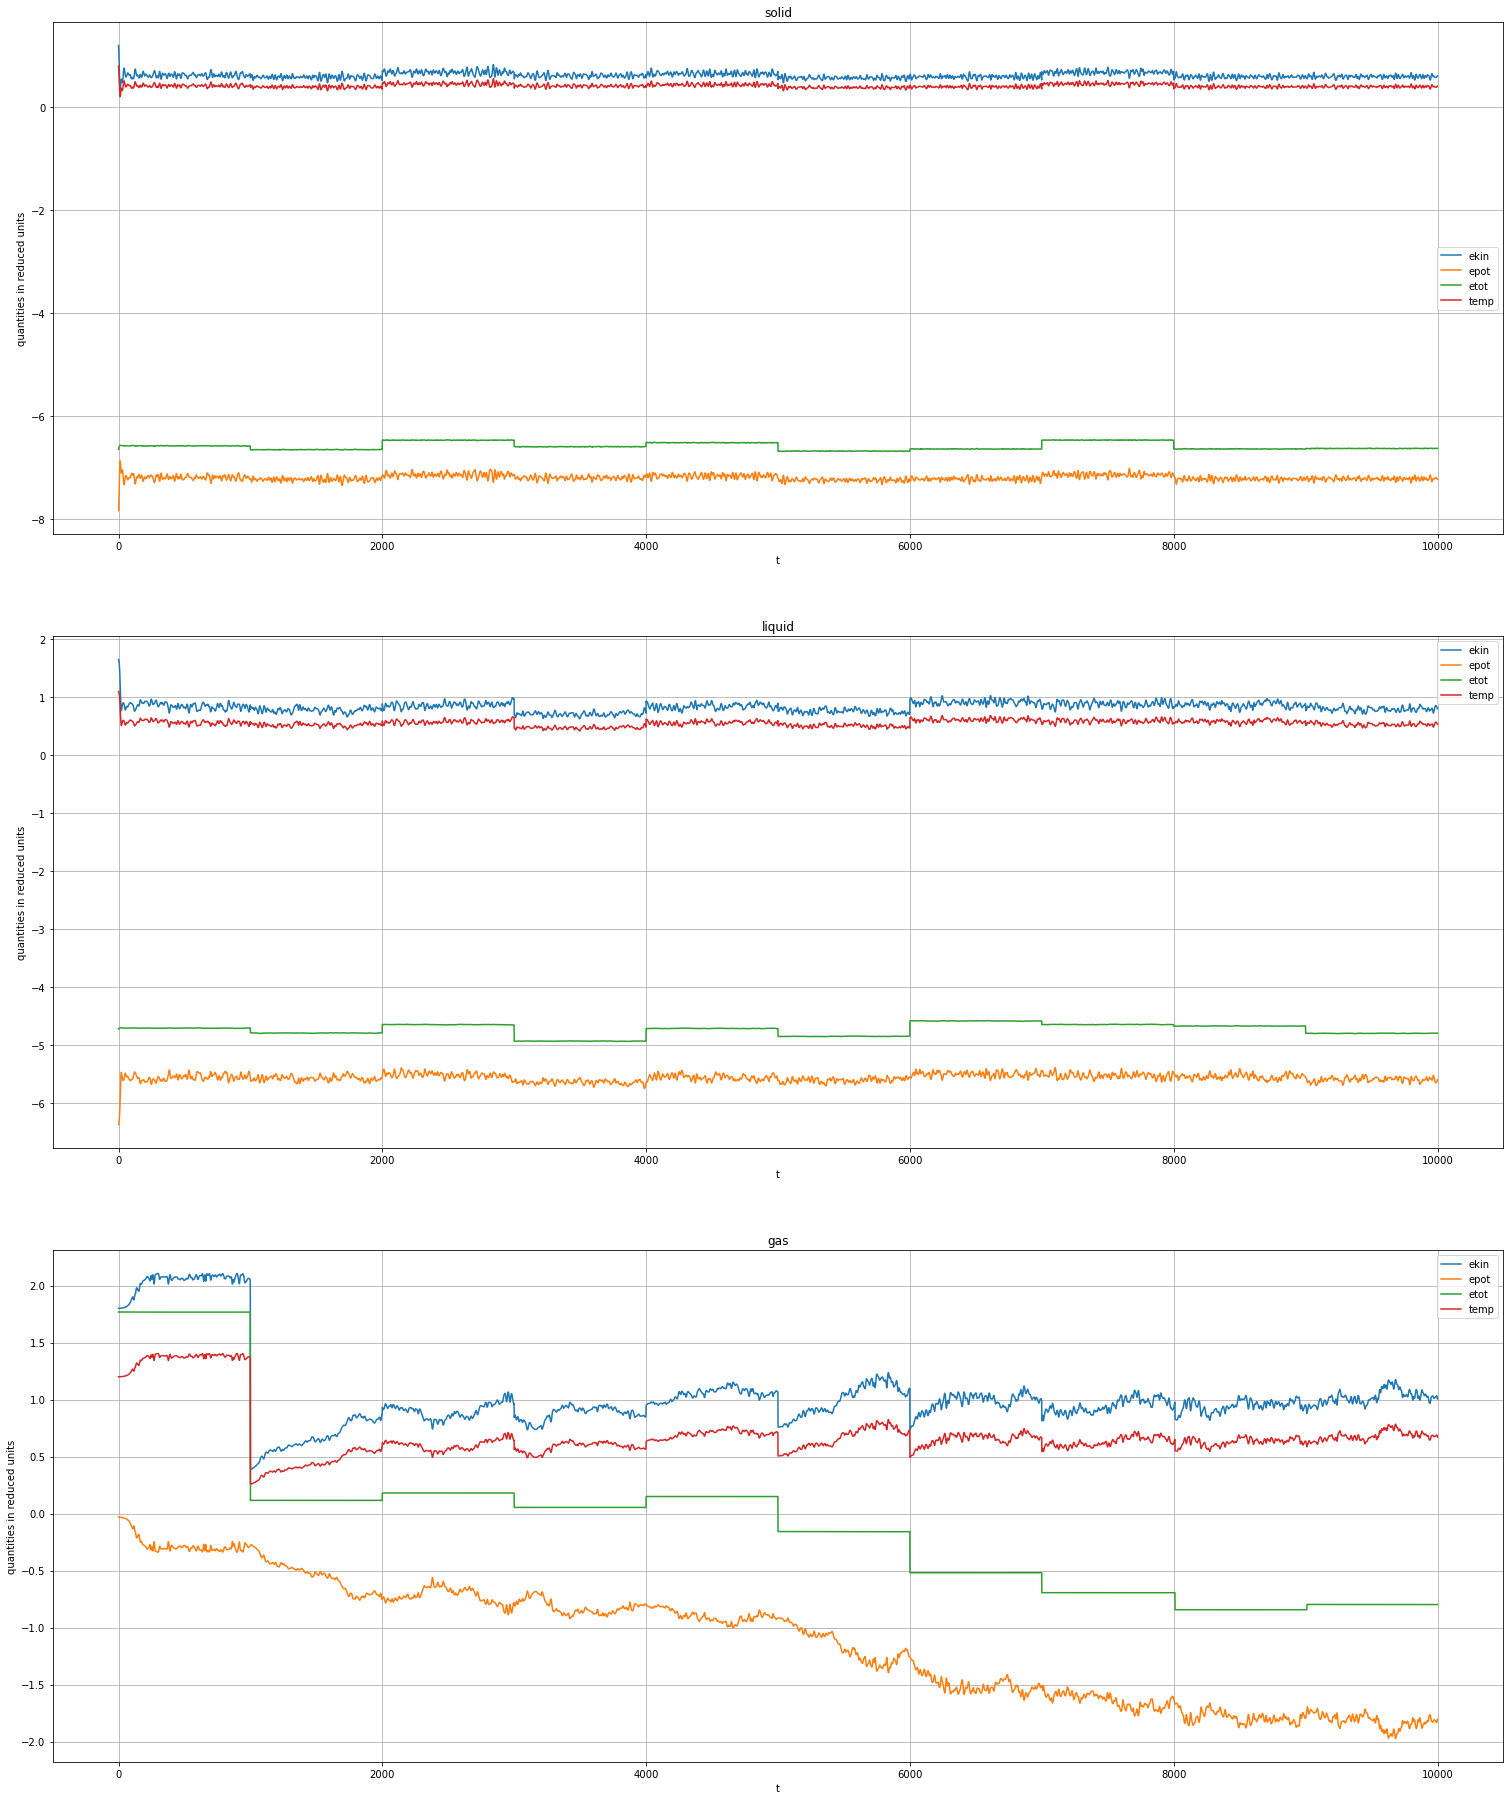

In [191]:
point = []

for j in range (0,3):
    for i in range (0,4):
        file = open("MolecularDynamics_NVE/output_"+ state[j] + "_" + title[i] + ".dat")
        rude = file.read()
        data = rude.split('\n')
        n=int(len(data)-1)
        x = np.zeros(n)
        file.close()
        for k in range(0,n):
            x[k] = float(data[k])
        point.append(x)       
    
fig, axx = plt.subplots(3, 1, figsize=(26, 32))
axx = axx.reshape(-1)
m=0
for s in range(3):
    ax = axx[s]
    ax.set_title(state[s])
    for l in range(4):
        ax.plot(np.arange(n) , point[m], label = title[l])
        m+=1
    ax.set_xlabel('t')
    ax.set_ylabel("quantities in reduced units")
    ax.legend()
    ax.grid()

I let equilibrate the system for 10 cycle, (i.e. $10^4$ time_step for ten times) and plotted one value every 10 time_step.

### Exercise 04.2

The Molecular Dynamics code we have provided prints out only instantaneous values for the total (internal) energy per particle, $E/N$, potential energy per particle, $U/N$, kinetic energy per particle, $K/N$, and temperature, $T$.
Take the MD code and include block averaging: 

Divide the <span style="color:blue"><font face="Courier">nstep</font></span> of the simulation into <span style="color:blue"><font face="Courier">nblocks</font></span>. By exploiting these blocks, <span style="color:red">code the calculation of the average values and the uncertainties for $E/N$, $U/N$, $K/N$ and $T$</span>, that will be written in new specific output files, for example: <font face="Courier">ave_epot.out, ave_ekin.out, ave_etot.out, ave_temp.out</font></span>

### Exercise 04.3

By means of your upgraded MD code, equilibrate and <span style="color:red">perform MD simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

and show in pictures the obtained average values and uncertainties for the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$ and the temperature, $T$ ... in SI units!

In [194]:
sigma = 0.34e-9
eps_kb = 120
m = 39.948*1.66e-27
kb = 1.38e-23
eps = eps_kb * kb
dt=0.109e-15
t=np.sqrt(m*sigma**2/eps)
unit = ["J","J","J","K"]

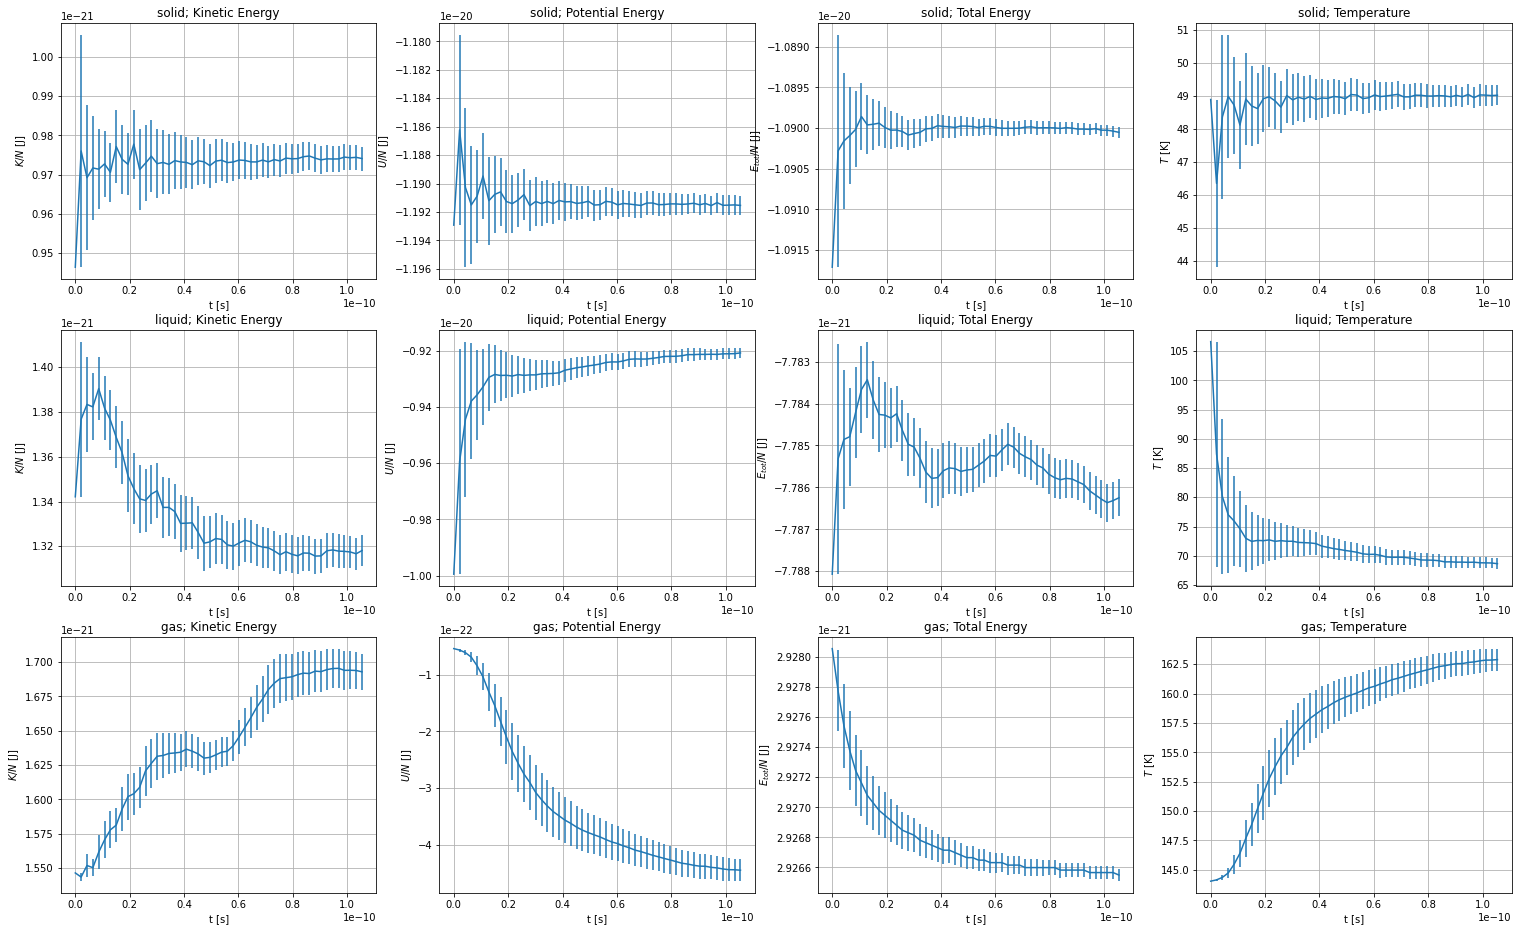

In [195]:
point = []
err= []
coeff = [eps, eps, eps, eps_kb]
for j in range (0,3):
    for i in range (0,4):
        file = open("MolecularDynamics_NVE/ave_" + state[j] + "_" + title[i] +".out")
        rude = file.read()
        data = rude.split('\n')
        n=int((len(data)-1)/2)
        x = np.zeros(n)
        y = np.zeros(n)
        file.close()
        for k in range(0,n):
            x[k] = float(data[ 2 * k ] )
            y[k] = float(data[ 2 * k + 1 ] )
        point.append(x)
        err.append(y)

fig, axx = plt.subplots(3, 4, figsize=(26, 16))
axx = axx.reshape(-1)
m = 0
for s in range(3):
    for l in range(4):
        ax = axx[m]
        ax.set_title(state[s] + "; " + S[l])
        ax.errorbar(t*np.arange(n) , coeff[l]*point[m] , yerr=coeff[l]*err[m])
        ax.set_xlabel(r"t [s]")
        ax.set_ylabel(Y[l]+" ["+unit[l]+"]")
        ax.grid()
        m += 1

I carried out the simulation for the system in $N=50$ blocks of $L=10^4$ steps, after an equilibration time of 10 cycles. So I made blocking method with the 1000 last values of instantaneous values of the quantities. Then converted in S.I. units.

### <span style="color:green"> Optional exercise</span>

Include the calculation of the pressure, $P$, inside your Molecular Dynamics code: istantaneous values, average values and uncertainties.

Remember that, via the **virial theorem**, the pressure in a Lennard-Jones system can be estimated by means of:

$$ P = \rho k_B T + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$